# The distribution of strong and weak pronouns in Dutch literature

TODOs:
- [x] take (stratisfied) sample (first 100 sents)
- [x] annotate weak/strong pronouns for: obligatory/idiomatic?, stylistic, emphasis, discourse?
  - [x] "hun" and "je" can be possessive
- [x] reproduce correlation plots with proper axis labels; highlight+label outliers
  - [x] show genre labels
- [x] investigate distribution of grammatical functions and other syntactic aspects
  - [x] report ze-SG vs ze-PL in outliers
  - [x] look features: red / vol / nadr. [nadr is used for jullie and -zelf]
- [ ] store search results as csv files.
- [x] investigate coreference aspects
  - [x] manually correct coreference output of first 100 sentences

In [57]:
from glob import glob
from scipy import stats
import pandas
import seaborn
import matplotlib.pyplot as plt
from discodop import treesearch
seaborn.set_style('ticks')

In [2]:
# NB: ignorecase should be enabled; word boundaries are important.
%cd ~/Riddle/tokenized
corpus = treesearch.RegexSearcher(glob('*.tok'), ignorecase=True)
strong = pandas.Series(corpus.counts(r'\b(mij|jij|jou|zij|wij|hen|hun)\b'))
weak = pandas.Series(corpus.counts(r'\b(me|je|ze|we)\b'))
total = pandas.Series({a: corpus.getinfo(a).numwords for a in corpus.files})
df = pandas.DataFrame({
    'Strong %': strong / total * 100,
    'Weak %': weak / total * 100,
    'Both %': (strong + weak) / total * 100,
    'Strong prop.': (100 * strong / (strong + weak)),
    }).sort_values(by='Strong prop.', ascending=False)
threshold = 31.2  # somewhat arbitrary cutoff ...
outliers = df[df['Strong prop.'] > threshold].index
outlierstok = list(outliers)
df.index = [a.replace('.tok', '') for a in df.index]
total.index = [a.replace('.tok', '') for a in total.index]
outliers = df[df['Strong prop.'] > threshold].index
df.loc[outliers, :].round(2)

/home/andreas/Riddle/tokenized


,Strong %,Weak %,Both %,Strong prop.
Springer_Quadriga,1.69,1.17,2.85,59.07
Mitchell_NietVerhoordeGebeden,0.84,0.71,1.55,54.02
Kooten_Verrekijker,1.07,0.93,2.00,53.28
Dewulf_KleineDagen,1.57,2.02,3.59,43.73
Japin_Vaslav,1.22,2.13,3.34,36.40
Bernlef_ZijnDood,1.03,1.94,2.97,34.61
Verhulst_LaatsteLiefdeVan,0.79,1.50,2.29,34.49
Siebelink_Oscar,0.83,1.80,2.63,31.61
Abdolah_Koning,0.75,1.64,2.39,31.28


In [3]:
df.head(15)

,Strong %,Weak %,Both %,Strong prop.
Springer_Quadriga,1.686170,1.168142,2.854312,59.074476
Mitchell_NietVerhoordeGebeden,0.839982,0.714841,1.554823,54.024287
Kooten_Verrekijker,1.065655,0.934272,1.999927,53.284672
Dewulf_KleineDagen,1.570135,2.020313,3.590447,43.730887
Japin_Vaslav,1.216867,2.126315,3.343182,36.398467
Bernlef_ZijnDood,1.028902,1.944123,2.973025,34.607907
Verhulst_LaatsteLiefdeVan,0.788981,1.498872,2.287853,34.485666
Siebelink_Oscar,0.831204,1.798247,2.629451,31.611316
Abdolah_Koning,0.748323,1.644115,2.392438,31.278689
Forsyth_Cobra,0.423440,0.934579,1.358019,31.180691


In [4]:
outliers

Index(['Springer_Quadriga', 'Mitchell_NietVerhoordeGebeden',
       'Kooten_Verrekijker', 'Dewulf_KleineDagen', 'Japin_Vaslav',
       'Bernlef_ZijnDood', 'Verhulst_LaatsteLiefdeVan', 'Siebelink_Oscar',
       'Abdolah_Koning'],
      dtype='object')

In [5]:
print(df.loc[outliers, :].round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Strong \% &  Weak \% &  Both \% &  Strong prop. \\
\midrule
Springer\_Quadriga             &      1.69 &    1.17 &    2.85 &         59.07 \\
Mitchell\_NietVerhoordeGebeden &      0.84 &    0.71 &    1.55 &         54.02 \\
Kooten\_Verrekijker            &      1.07 &    0.93 &    2.00 &         53.28 \\
Dewulf\_KleineDagen            &      1.57 &    2.02 &    3.59 &         43.73 \\
Japin\_Vaslav                  &      1.22 &    2.13 &    3.34 &         36.40 \\
Bernlef\_ZijnDood              &      1.03 &    1.94 &    2.97 &         34.61 \\
Verhulst\_LaatsteLiefdeVan     &      0.79 &    1.50 &    2.29 &         34.49 \\
Siebelink\_Oscar               &      0.83 &    1.80 &    2.63 &         31.61 \\
Abdolah\_Koning                &      0.75 &    1.64 &    2.39 &         31.28 \\
\bottomrule
\end{tabular}



## Correlations

In [6]:
md = pandas.read_csv('/home/andreas/Riddle/metadata.csv', index_col=0)
md.head()

,Author,Title,Category,Riddle code,Translated,Author gender,Author origin,Original language,Inclusion criterion,Publication date,First print,Publisher,English title,Literary rating,# literary ratings,Quality rating,# quality ratings
Label,,,,,,,,,,,,,,,,,
Abdolah_Koning,"Abdolah, Kader",De koning,Fiction,301-302 (VERTAALDE) LITERAIRE ROMAN,no,male,NL,NL,bestseller,2011-02-28,2011,"Geus B.V., Uitgeverij De",The King,5.836634,404,5.907960,402
Abdolah_Kraai,"Abdolah, Kader",De kraai,Fiction,301-302 (VERTAALDE) LITERAIRE ROMAN,no,male,NL,NL,boekenweekgeschenk,2011-03-14,2011,"Geus B.V., Uitgeverij De",NaN,5.510490,715,5.232143,728
Adler-Olsen_Bedrijfsterrorist,"Adler-Olsen, Jussi",De bedrijfsterrorist,Suspense,305 LITERAIRE THRILLER,yes,male,DK,DK,bestseller,2011-05-30,2011,"Prometheus, Uitgeverij",NaN,4.205387,297,5.653465,303
Adler-Olsen_Dossier64,"Adler-Olsen, Jussi",Dossier 64,Suspense,305 LITERAIRE THRILLER,yes,male,DK,DK,bestseller,2011-04-25,2011,"Prometheus, Uitgeverij",NaN,4.180879,387,6.210526,399
Adler-Olsen_Fazantenmoordenaars,"Adler-Olsen, Jussi",De fazantenmoordenaars,Suspense,305 LITERAIRE THRILLER,yes,male,DK,DK,bestseller,2010-06-28,2010,"Prometheus, Uitgeverij",The Absent One: A Department Q Novel (US),3.964578,367,6.023873,377


(-0.3215024778591344, 4.2855086029071645e-11)

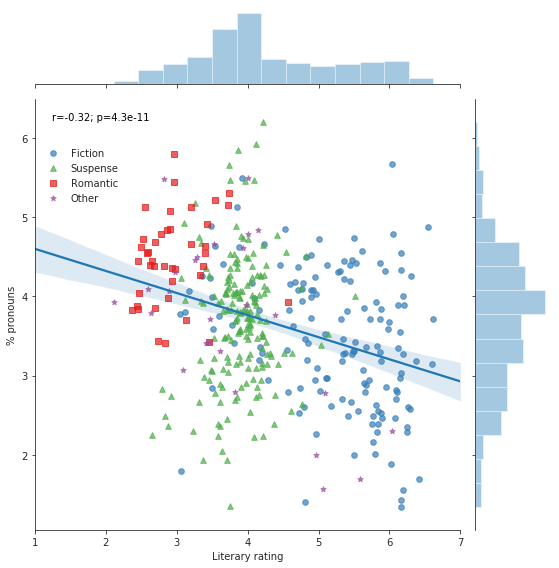

In [94]:
#g = seaborn.jointplot(y=df.loc[md.index, 'Both %'], x=md['Literary rating'],
#        kind='reg', stat_func=None);
#g.ax_joint.text(0.95, 0.95, 'r=%3.2g; p=%.2g' % stats.pearsonr(
#       md['Literary rating'], df.loc[md.index, 'Both %']),
#       horizontalalignment='right', size='medium', color='black', transform=g.ax_joint.transAxes)
g = seaborn.jointplot(y=df.loc[md.index, 'Both %'], x=md['Literary rating'],
        kind='reg', xlim=(1, 7), marginal_kws=dict(kde=False), height=8);
g.ax_joint.text(
        0.27, 0.95,
        'r=%3.2g; p=%.2g' % stats.pearsonr(df.loc[md.index, 'Both %'], md['Literary rating']),
        horizontalalignment='right', size='medium', color='black', transform=g.ax_joint.transAxes)
g.set_axis_labels('Literary rating', '% pronouns');
g.ax_joint.collections[0].set_visible(False)
markers = list('o^s*');
colors = seaborn.color_palette("Set1", 4)
colors = [
    (0.21602460800432691, 0.49487120380588606, 0.71987698697576341),
    (0.30426760128900115, 0.68329106055054012, 0.29293349969620797),
    (0.89411765336990356, 0.10196078568696976, 0.10980392247438431),
    (0.60083047361934883, 0.30814303335021526, 0.63169552298153153)]

# Plot each group of points separately
for n, cat in enumerate(['Fiction', 'Suspense', 'Romantic', 'Other']):
    g.ax_joint.scatter(
            md.loc[md.Category == cat, 'Literary rating'],
            df.loc[md[md.Category == cat].index, 'Both %'],
            color=colors[n], marker=markers[n], label=cat, alpha=0.7, s=32)
g.ax_joint.legend(loc=(0.01, 0.75), frameon=False)

g.savefig('/tmp/bothpronouns.pdf')
g.savefig('/tmp/bothpronouns.png', dpi=300)
stats.pearsonr(df.loc[md.index, 'Both %'], md['Literary rating'])

/home/andreas/.local/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


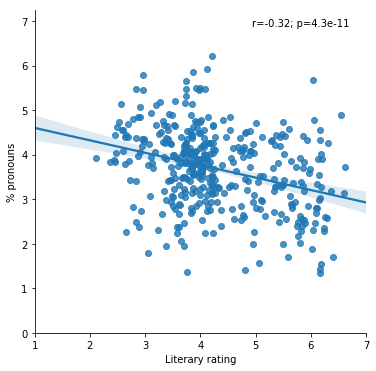

In [99]:
g = seaborn.JointGrid(y=df.loc[md.index, 'Both %'], x=md['Literary rating'], ratio=100, ylim=(0, 7.25), xlim=(1, 7))
g.plot_joint(seaborn.regplot)
g.ax_joint.text(0.95, 0.95, 'r=%3.2g; p=%.2g' % stats.pearsonr(md['Literary rating'], df.loc[md.index, 'Both %']), horizontalalignment='right', size='medium', color='black', transform=g.ax_joint.transAxes)
g.set_axis_labels('Literary rating', '% pronouns');
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.savefig('/tmp/bothpronouns.pdf')

(0.3789626356335094, 3.837606204475695e-15)

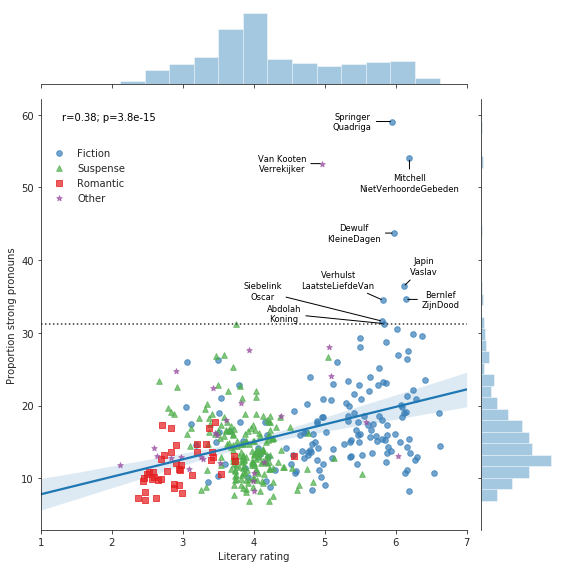

In [95]:
g = seaborn.jointplot(y=df.loc[md.index, 'Strong prop.'], x=md['Literary rating'],
        kind='reg', xlim=(1, 7), marginal_kws=dict(kde=False), height=8);
g.ax_joint.text(
        0.27, 0.95,
        'r=%3.2g; p=%.2g' % stats.pearsonr(md['Literary rating'], df.loc[md.index, 'Strong prop.']),
        horizontalalignment='right', size='medium', color='black', transform=g.ax_joint.transAxes)
g.set_axis_labels('Literary rating', 'Proportion strong pronouns');
g.ax_joint.collections[0].set_visible(False)
g.fig.axes[0].plot([1, 7], [threshold, threshold], c=".2", ls=":",)
markers = list('o^s*');
colors = seaborn.color_palette("Set1", 4)
colors = [
    (0.21602460800432691, 0.49487120380588606, 0.71987698697576341),
    (0.30426760128900115, 0.68329106055054012, 0.29293349969620797),
    (0.89411765336990356, 0.10196078568696976, 0.10980392247438431),
    (0.60083047361934883, 0.30814303335021526, 0.63169552298153153)]

# Plot each group of points separately
for n, cat in enumerate(['Fiction', 'Suspense', 'Romantic', 'Other']):
    g.ax_joint.scatter(
            md.loc[md.Category == cat, 'Literary rating'],
            df.loc[md[md.Category == cat].index, 'Strong prop.'],
            color=colors[n], marker=markers[n], label=cat, alpha=0.7, s=32)
g.ax_joint.legend(loc=(0.01, 0.75), frameon=False)
#g.ax_joint.scatter(
#        md.loc[df.index.difference(outliers), 'Literary rating'],
#        df.loc[df.index.difference(outliers), 'Strong prop.'],
#        color=colors[1], marker=markers[0], label='Rest')
#g.ax_joint.scatter(
#        md.loc[outliers, 'Literary rating'],
#        df.loc[outliers, 'Strong prop.'],
#        color=colors[0], marker=markers[1], label='Outlier')
o = {
 'Springer_Quadriga': (-40, 0),
 'Mitchell_NietVerhoordeGebeden': (0, -25),
 'Kooten_Verrekijker': (-40, 0),
 'Dewulf_KleineDagen': (-40, 0),
 'Japin_Vaslav': (20, 20),
 'Bernlef_ZijnDood': (35, 0),
 'Verhulst_LaatsteLiefdeVan': (-45, 20),
 'Siebelink_Oscar': (-120, 30),
 'Abdolah_Koning': (-100, 10),
}
for label in outliers:
    x = md.at[label, 'Literary rating']
    y = df.at[label, 'Strong prop.']
    xt, yt = o[label]
    ha = 'center'
    g.ax_joint.annotate(
        label.replace('_', '\n').replace('Kooten', 'Van Kooten'),
        xy=(x, y),
        xytext=(xt, yt),
        textcoords='offset points',
        color='k', fontsize='small',
        # ha='left', va='top',
        horizontalalignment=ha, verticalalignment='center', 
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-', lw=1))
g.savefig('/tmp/strongvsbothpronouns.pdf')
g.savefig('/tmp/strongvsbothpronouns.png', dpi=300)
stats.pearsonr(md['Literary rating'], df.loc[md.index, 'Strong prop.'])

In [11]:
stats.pearsonr(
    md.loc[md.index, 'Literary rating'],
    df.loc[md.index, 'Strong prop.'])

(0.3789626356335094, 3.837606204475695e-15)

In [10]:
stats.pearsonr(
    md.loc[md.index.difference(outliers), 'Literary rating'],
    df.loc[md.index.difference(outliers), 'Strong prop.'])

(0.32171186929929035, 6.870521670756928e-11)

/home/andreas/.local/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


(0.3789626356335094, 3.837606204475695e-15)

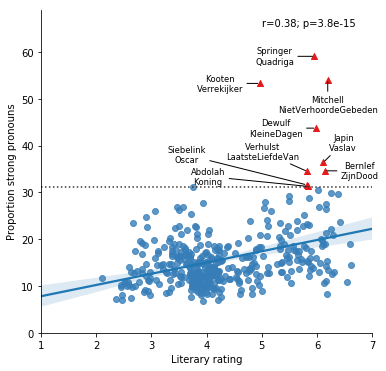

In [101]:
# version without histograms on axes
g = seaborn.JointGrid(y=df.loc[md.index, 'Strong prop.'], x=md['Literary rating'], ratio=100, ylim=(0, 69), xlim=(1, 7))
g.plot_joint(seaborn.regplot)
g.ax_joint.text(0.95, 0.95, 'r=%3.2g; p=%.2g' % stats.pearsonr(md['Literary rating'], df.loc[md.index, 'Strong prop.']), horizontalalignment='right', size='medium', color='black', transform=g.ax_joint.transAxes)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.set_axis_labels('Literary rating', 'Proportion strong pronouns');
g.ax_joint.collections[0].set_visible(False)
g.fig.axes[0].plot([1, 7], [threshold, threshold], c=".2", ls=":",)
markers = list('o^s*');
colors = seaborn.color_palette("Set1", 4)

# Plot each group of points separately
g.ax_joint.scatter(
        md.loc[df.index.difference(outliers), 'Literary rating'],
        df.loc[df.index.difference(outliers), 'Strong prop.'],
        color=colors[1], marker=markers[0], alpha=.8, label='Rest')
g.ax_joint.scatter(
        md.loc[outliers, 'Literary rating'],
        df.loc[outliers, 'Strong prop.'],
        color=colors[0], marker=markers[1], label='Outlier')
o = {
 'Springer_Quadriga': (-40, 0),
 'Mitchell_NietVerhoordeGebeden': (0, -25),
 'Kooten_Verrekijker': (-40, 0),
 'Dewulf_KleineDagen': (-40, 0),
 'Japin_Vaslav': (20, 20),
 'Bernlef_ZijnDood': (35, 0),
 'Verhulst_LaatsteLiefdeVan': (-45, 20),
 'Siebelink_Oscar': (-120, 30),
 'Abdolah_Koning': (-100, 10),
}
for label in outliers:
    x = md.at[label, 'Literary rating']
    y = df.at[label, 'Strong prop.']
    xt, yt = o[label]
    ha = 'center'
    g.ax_joint.annotate(
        label.replace('_', '\n'),
        xy=(x, y),
        xytext=(xt, yt),
        textcoords='offset points',
        color='k', fontsize='small',
        # ha='left', va='top',
        horizontalalignment=ha, verticalalignment='center', 
        arrowprops=dict(facecolor='black', arrowstyle='-', lw=1))
g.savefig('/tmp/strongvsbothpronouns.pdf')
stats.pearsonr(md['Literary rating'], df.loc[md.index, 'Strong prop.'])

## Query with POS tags

In [13]:
# NB: should ignore case
%cd ~/Riddle/parses/
# Use a regular expression to identify POS, func, and token;
# dash separates POS and func, but may also occur inside POS.
funre = '^\((\w+\[[^\]]*\])-?(\w*) (\w+)\)$'
import re
tokenre = re.compile(r' ([^ ()]+)\)')
tcorpus = treesearch.TgrepSearcher(glob('*.mrg'), numproc=1)
pospronoun = pandas.DataFrame.from_records(
        [(text, lineno, match, ' '.join(tokenre.findall(sent))) for text, lineno, sent, match, _match2
            in tcorpus.sents(r'/^VNW\[p[re]/ < /^([Mm]ij|[Jj]ij|[Jj]ou|[Zz]ij|[Ww]ij|[Hh]en|[Hh]un|[Mm]e|[Jj]e|[Zz]e|[Ww]e)$/',
            # subset=['Siebelink_Oscar.mrg.t2c.gz'],
            # subset=[a + '.mrg' for a in novels_to_annotate],
            brackets=True, maxresults=None)],
        columns=['novel', 'lineno', 'match', 'sent'])
pospronoun['novel'] = pospronoun['novel'].str.replace('.mrg', '')
x = pospronoun.match.str.extract(funre)
pospronoun['pos'] = x[0]
pospronoun['func'] = x[1]
pospronoun['token'] = x[2]
pospronoun['number'] = ['SG' if 'ev' in a else ('PL' if 'mv' in a else '')
                        for a in pospronoun['pos']]
pospronoun['tokenplus'] = x[2].str.lower()
ambig = pospronoun['tokenplus'].isin(('ze', 'zij'))
pospronoun.loc[ambig, 'tokenplus'] = pospronoun.loc[ambig, 'tokenplus'].str.cat(pospronoun.loc[ambig, 'number'], sep='-')

/home/andreas/Riddle/parses


In [14]:
curnovel, curlineno, curnum = None, None, None
def assignnum(row):
    global curnovel, curlineno, curnum
    novel = row['novel']
    lineno = row['lineno']
    if novel == curnovel and lineno == curlineno:
        curnum += 1
    else:
        curnovel = novel
        curlineno = lineno
        curnum = 1
    return curnum

pospronoun.insert(2, 'matchno', pospronoun.apply(assignnum, axis=1))
pospronoun.insert(3, 'form', [0 if a in ('me', 'je', 'we', 'ze') else 1 for a in pospronoun.token.str.lower()])

In [15]:
pospronoun.to_csv('/tmp/pospronoun.csv.gz', compression='gzip')

In [16]:
pospronoun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761446 entries, 0 to 1761445
Data columns (total 11 columns):
novel        object
lineno       int64
matchno      int64
form         int64
match        object
sent         object
pos          object
func         object
token        object
number       object
tokenplus    object
dtypes: int64(3), object(8)
memory usage: 147.8+ MB


In [17]:
newdf = pospronoun.groupby('novel')['form'].value_counts().unstack()
newdf.columns = ['weak', 'strong']
newdf['total_words'] =  pandas.Series({a.replace('.mrg', ''): tcorpus.getinfo(a).numwords for a in tcorpus.files})
newdf['Strong %'] = newdf.strong / newdf.total_words * 100
newdf['Weak %'] = newdf.weak / newdf.total_words * 100
newdf['Both %'] = (newdf.strong + newdf.weak) / newdf.total_words * 100
newdf['Strong prop.'] = (100 * newdf.strong / (newdf.strong + newdf.weak))
newdf = newdf.sort_values(by='Strong prop.', ascending=False)
# threshold = 31.2  # somewhat arbitrary cutoff ...
# outliers = newdf[newdf['Strong prop.'] > threshold].index
# newdf.loc[outliers, :].round(2)

In [18]:
newdf.head(15)

,weak,strong,total_words,Strong %,Weak %,Both %,Strong prop.
novel,,,,,,,
Springer_Quadriga,524,773,48452,1.595393,1.081483,2.676876,59.599075
Kooten_Verrekijker,228,244,27400,0.890511,0.832117,1.722628,51.694915
Mitchell_NietVerhoordeGebeden,1531,1499,227742,0.658201,0.672252,1.330453,49.471947
Dewulf_KleineDagen,1089,690,54644,1.262719,1.992899,3.255618,38.785835
Japin_Vaslav,2358,1168,117103,0.997413,2.013612,3.011024,33.125355
Bernlef_ZijnDood,980,462,51899,0.890191,1.888283,2.778474,32.038835
Hart_Verlovingstijd,3231,1346,110598,1.217020,2.921391,4.138411,29.407909
Verhulst_LaatsteLiefdeVan,730,294,51838,0.567152,1.408233,1.975385,28.710938
Siebelink_Oscar,543,213,30918,0.688919,1.756258,2.445178,28.174603


(0.3789626356335094, 3.837606204475695e-15)

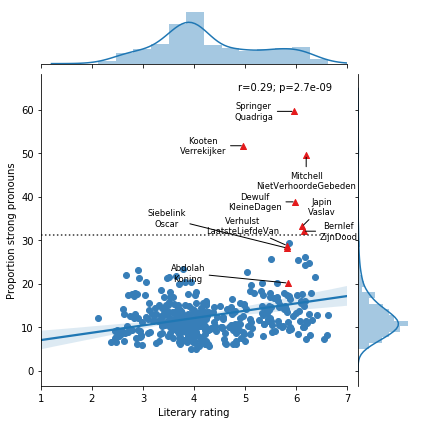

In [337]:
g = seaborn.jointplot(y=newdf.loc[md.index, 'Strong prop.'], x=md['Literary rating'],
        kind='reg', xlim=(1, 7));
g.ax_joint.text(0.95, 0.95, 'r=%3.2g; p=%.2g' % stats.pearsonr(md['Literary rating'], newdf.loc[md.index, 'Strong prop.']),
                horizontalalignment='right', size='medium', color='black', transform=g.ax_joint.transAxes)
g.set_axis_labels('Literary rating', 'Proportion strong pronouns');
g.ax_joint.collections[0].set_visible(False)
g.fig.axes[0].plot([1, 7], [threshold, threshold], c=".2", ls=":",)
markers = list('o^s*');
colors = seaborn.color_palette("Set1", 4)

# Plot each group of points separately
g.ax_joint.scatter(
        md.loc[newdf.index.difference(outliers), 'Literary rating'],
        newdf.loc[newdf.index.difference(outliers), 'Strong prop.'],
        color=colors[1], marker=markers[0], label='Rest')
g.ax_joint.scatter(
        md.loc[outliers, 'Literary rating'],
        newdf.loc[outliers, 'Strong prop.'],
        color=colors[0], marker=markers[1], label='Outlier')
o = {
 'Springer_Quadriga': (-40, 0),
 'Mitchell_NietVerhoordeGebeden': (0, -25),
 'Kooten_Verrekijker': (-40, 0),
 'Dewulf_KleineDagen': (-40, 0),
 'Japin_Vaslav': (20, 20),
 'Bernlef_ZijnDood': (35, 0),
 'Verhulst_LaatsteLiefdeVan': (-45, 20),
 'Siebelink_Oscar': (-120, 30),
 'Abdolah_Koning': (-100, 10),
}
for label in outliers:
    x = md.at[label, 'Literary rating']
    y = newdf.at[label, 'Strong prop.']
    xt, yt = o[label]
    ha = 'center'
    g.ax_joint.annotate(
        label.replace('_', '\n'),
        xy=(x, y),
        xytext=(xt, yt),
        textcoords='offset points',
        color='k', fontsize='small',
        # ha='left', va='top',
        horizontalalignment=ha, verticalalignment='center', 
        arrowprops=dict(facecolor='black', arrowstyle='-', lw=1))
g.savefig('/tmp/strongvsbothpronouns.pdf')
stats.pearsonr(md['Literary rating'], df.loc[md.index, 'Strong prop.'])

In [31]:
pronouns_to_annotate = pospronoun[(pospronoun.lineno <= 100)]

In [32]:
pronouns_to_annotate.to_csv('/tmp/annotate.csv', index=False)

In [33]:
pospronoun.head()

,novel,lineno,matchno,form,match,sent,pos,func,token,number,tokenplus
0,Barnes_AlsofVoorbijIs.mrg,2,1,1,"(VNW[pr,pron,obl,red,1,ev]-se mij)","Ik herinner mij , in een willekeurige volgorde :","VNW[pr,pron,obl,red,1,ev]",se,mij,SG,mij
1,Barnes_AlsofVoorbijIs.mrg,9,1,0,"(VNW[pers,pron,nomin,red,2v,ev]-su je)",Dat laatste is niet iets wat ik werkelijk heb ...,"VNW[pers,pron,nomin,red,2v,ev]",su,je,SG,je
2,Barnes_AlsofVoorbijIs.mrg,9,2,0,"(VNW[pr,pron,obl,red,2v,getal]-se je)",Dat laatste is niet iets wat ik werkelijk heb ...,"VNW[pr,pron,obl,red,2v,getal]",se,je,,je
3,Barnes_AlsofVoorbijIs.mrg,9,3,0,"(VNW[pers,pron,nomin,red,2v,ev]-su je)",Dat laatste is niet iets wat ik werkelijk heb ...,"VNW[pers,pron,nomin,red,2v,ev]",su,je,SG,je
4,Barnes_AlsofVoorbijIs.mrg,10,1,0,"(VNW[pers,pron,nomin,red,1,mv]-su We)",We leven in tijd - die beperkt ons en bewerkt ...,"VNW[pers,pron,nomin,red,1,mv]",su,We,PL,we


In [8]:
pospronoun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761446 entries, 0 to 1761445
Data columns (total 9 columns):
novel        object
lineno       int64
matchno      int64
match        object
pos          object
func         object
token        object
number       object
tokenplus    object
dtypes: int64(2), object(7)
memory usage: 120.9+ MB


In [19]:
ct = pandas.crosstab(pospronoun.novel, pospronoun.tokenplus)

In [20]:
colorder = ['mij', 'me', 'jij', 'jou', 'je', 'zij-SG', 'ze-SG',
            'wij', 'we', 'zij-PL', 'hen', 'hun', 'ze-PL']

In [21]:
ct.loc[outliers, colorder]

tokenplus,mij,me,jij,jou,je,zij-SG,ze-SG,wij,we,zij-PL,hen,hun,ze-PL
Springer_Quadriga,407,14,16,20,187,202,183,86,68,37,5,0,72
Mitchell_NietVerhoordeGebeden,471,231,50,20,255,252,522,345,234,222,120,19,289
Kooten_Verrekijker,91,7,9,4,108,44,25,58,17,27,7,4,71
Dewulf_KleineDagen,178,39,54,13,81,144,380,219,228,64,14,4,361
Japin_Vaslav,348,408,90,60,758,255,416,262,195,100,41,12,581
Bernlef_ZijnDood,327,79,31,8,184,38,458,34,118,15,9,0,141
Verhulst_LaatsteLiefdeVan,55,7,29,24,230,77,282,27,45,58,17,7,166
Siebelink_Oscar,24,28,14,14,144,106,137,20,107,18,17,0,127
Abdolah_Koning,77,84,35,41,348,19,258,101,547,38,173,21,769


In [22]:
relfreq = ((ct.loc[:, colorder].T / total) * 100).T
relfreq.head().round(2)

tokenplus,mij,me,jij,jou,je,zij-SG,ze-SG,wij,we,zij-PL,hen,hun,ze-PL
Abdolah_Koning,0.06,0.07,0.03,0.03,0.27,0.01,0.20,0.08,0.43,0.03,0.14,0.02,0.60
Abdolah_Kraai,0.20,0.62,0.03,0.03,0.64,0.04,0.30,0.02,0.35,0.01,0.10,0.01,0.59
Adler-Olsen_Bedrijfsterrorist,0.08,0.10,0.07,0.02,0.68,0.03,1.13,0.03,0.21,0.02,0.09,0.01,0.44
Adler-Olsen_Dossier64,0.09,0.18,0.19,0.04,0.94,0.06,1.07,0.05,0.27,0.03,0.08,0.00,0.44
Adler-Olsen_Fazantenmoordenaars,0.07,0.14,0.15,0.02,0.91,0.07,1.16,0.03,0.27,0.03,0.11,0.02,0.60


In [23]:
relfreq.loc[outliers, :].round(2)

tokenplus,mij,me,jij,jou,je,zij-SG,ze-SG,wij,we,zij-PL,hen,hun,ze-PL
Springer_Quadriga,0.84,0.03,0.03,0.04,0.39,0.42,0.38,0.18,0.14,0.08,0.01,0.00,0.15
Mitchell_NietVerhoordeGebeden,0.21,0.10,0.02,0.01,0.11,0.11,0.23,0.15,0.10,0.10,0.05,0.01,0.13
Kooten_Verrekijker,0.33,0.03,0.03,0.01,0.39,0.16,0.09,0.21,0.06,0.10,0.03,0.01,0.26
Dewulf_KleineDagen,0.33,0.07,0.10,0.02,0.15,0.26,0.70,0.40,0.42,0.12,0.03,0.01,0.66
Japin_Vaslav,0.30,0.35,0.08,0.05,0.65,0.22,0.36,0.22,0.17,0.09,0.04,0.01,0.50
Bernlef_ZijnDood,0.63,0.15,0.06,0.02,0.35,0.07,0.88,0.07,0.23,0.03,0.02,0.00,0.27
Verhulst_LaatsteLiefdeVan,0.11,0.01,0.06,0.05,0.44,0.15,0.54,0.05,0.09,0.11,0.03,0.01,0.32
Siebelink_Oscar,0.08,0.09,0.05,0.05,0.47,0.34,0.44,0.06,0.35,0.06,0.05,0.00,0.41
Abdolah_Koning,0.06,0.07,0.03,0.03,0.27,0.01,0.20,0.08,0.43,0.03,0.14,0.02,0.60


In [24]:
divergence = relfreq.loc[outliers, :] - relfreq.mean()
divergence.columns.name = 'form'
divergence

form,mij,me,jij,jou,je,zij-SG,ze-SG,wij,we,zij-PL,hen,hun,ze-PL
Springer_Quadriga,0.738889,-0.335795,-0.065504,0.001292,-0.365428,0.366184,-0.772460,0.141914,-0.166078,0.050748,-0.044891,-0.006677,-0.295166
Mitchell_NietVerhoordeGebeden,0.105712,-0.263259,-0.076571,-0.031203,-0.639401,0.059936,-0.920940,0.115909,-0.203673,0.071864,-0.002519,0.001666,-0.316867
Kooten_Verrekijker,0.231004,-0.339143,-0.065680,-0.025387,-0.357223,0.109863,-1.058908,0.176094,-0.244379,0.072922,-0.029663,0.007921,-0.184649
Dewulf_KleineDagen,0.224638,-0.293319,0.000294,-0.016195,-0.603139,0.212804,-0.454748,0.365191,0.110818,0.091505,-0.029590,0.000643,0.216864
Japin_Vaslav,0.196071,-0.016281,-0.021671,0.011252,-0.104081,0.167040,-0.794906,0.188155,-0.139901,0.059780,-0.020198,0.003570,0.052376
Bernlef_ZijnDood,0.528957,-0.212473,-0.038795,-0.024570,-0.396841,0.022503,-0.267679,0.029933,-0.079060,0.003287,-0.037869,-0.006677,-0.172088
Verhulst_LaatsteLiefdeVan,0.004997,-0.351186,-0.042583,0.006312,-0.307688,0.097822,-0.606154,0.016507,-0.219613,0.086271,-0.022416,0.006827,-0.123542
Siebelink_Oscar,-0.023478,-0.274130,-0.053246,0.005295,-0.285636,0.292116,-0.707053,0.029108,0.039645,0.032602,-0.000227,-0.006677,-0.033013
Abdolah_Koning,-0.040701,-0.298799,-0.071071,-0.007824,-0.478396,-0.035811,-0.947769,0.043648,0.122650,0.004193,0.080492,0.009796,0.159444


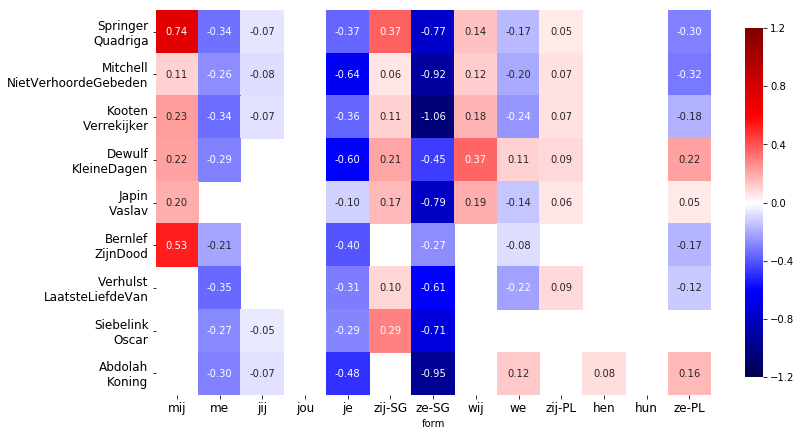

In [25]:
divergence.index = divergence.index.str.replace('_', '\n')
ax = seaborn.heatmap(divergence, annot=True, fmt='.2f', center=0.0,
        square=True, vmin=-1.2, vmax=1.2, mask=divergence.abs() < 0.05,
        cbar_kws=dict(shrink=0.5), cmap='seismic');
ax.figure.set_size_inches(12, 10);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12);
ax.figure.tight_layout()
ax.figure.savefig('/tmp/heatmap.pdf')
ax.figure.savefig('/tmp/heatmap.png', dpi=300)

## Manual analysis

In [26]:
annot = pandas.read_table('/home/andreas/Dropbox/accepted/Wuerzburg2019/Riddle strong and weak pronouns.tsv')
annot = annot.fillna(0)
annot['form'] = annot.form.replace([0, 1], ['weak', 'strong']).astype('category')
annot['type'] = annot.type.replace([0, 1, 2, 3, 4], ['personal', 'possessive', 'generic', 'nonpersonal', 'verb']).astype('category')
annot['status'] = annot.status.replace([0, 1, 2], ['free', 'preferred', 'obligatory']).astype('category')
annot['emphasis'] = annot.emphasis.replace([0, 1], [False, True])
annot['meaning change'] = annot['meaning change'].replace([0, 1], [False, True])
annot['length'] = annot.sent.str.len()
annot.head()

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
0,weak,free,False,False,personal,Abdolah_Koning,5,1,Ahuramazda zegende de Koe : ' We hebben nieman...,189
1,strong,preferred,False,False,personal,Abdolah_Koning,5,2,Ahuramazda zegende de Koe : ' We hebben nieman...,189
2,strong,preferred,False,False,personal,Abdolah_Koning,5,3,Ahuramazda zegende de Koe : ' We hebben nieman...,189
3,strong,preferred,False,False,personal,Abdolah_Koning,5,4,Ahuramazda zegende de Koe : ' We hebben nieman...,189
4,strong,obligatory,False,False,personal,Abdolah_Koning,5,5,Ahuramazda zegende de Koe : ' We hebben nieman...,189


In [38]:
for _, a in annot[annot.type == 'nonpersonal'].iterrows(): print(a)

form                                                           weak
status                                                    preferred
emphasis                                                      False
meaning change                                                False
type                                                    nonpersonal
novel                                              Bernlef_ZijnDood
lineno                                                           56
matchno                                                           2
sent              Aan de dikke laag stof kon je zien dat ze lang...
length                                                           73
Name: 49, dtype: object
form                                                           weak
status                                                   obligatory
emphasis                                                      False
meaning change                                                False
type                    

In [27]:
annot.type.value_counts(normalize=True)

personal       0.851124
possessive     0.073034
generic        0.056180
nonpersonal    0.016854
verb           0.002809
Name: type, dtype: float64

In [23]:
annot['meaning change'].value_counts()

False    353
True       3
Name: meaning change, dtype: int64

In [24]:
annot[annot['meaning change']]

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
73,strong,free,True,True,personal,Dewulf_KleineDagen,64,1,"Maar als hij huilt , doen wij dat niet .",40
128,strong,free,True,True,personal,Japin_Vaslav,86,1,Jij moet mee om bij te lichten . ',34
269,weak,preferred,False,True,personal,Springer_Quadriga,58,1,Ze hadden het in Amsterdam maar te pikken .,43


In [25]:
annot.loc[(annot.status == 'free') & (annot.form == 'weak'), :].sort_values(by='length').head()

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
38,weak,free,False,False,personal,Bernlef_ZijnDood,30,1,We speuren erfgenamen op .,26
230,weak,free,False,False,generic,Siebelink_Oscar,61,1,Je kunt het niet bedenken .,27
86,weak,free,False,False,personal,Japin_Vaslav,26,1,Dat is me niet in dank afgenomen .,34
124,weak,free,False,False,personal,Japin_Vaslav,75,1,"Als ik struikel , schiet ze in de lach .",40
234,weak,free,False,False,personal,Siebelink_Oscar,68,1,"Ik zal er altijd voor je zijn , Esmée .",40


In [26]:
annot.loc[(annot.status == 'preferred') & (annot.form == 'weak'), :].sort_values(by='length').head()

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
348,weak,preferred,False,False,personal,Verhulst_LaatsteLiefdeVan,90,1,Waarom zouden ze ?,18
235,weak,preferred,False,False,personal,Siebelink_Oscar,69,1,Dat weet je toch ? ',20
236,weak,preferred,False,False,personal,Siebelink_Oscar,74,1,Dat weet je toch ? ',21
240,weak,preferred,False,False,personal,Siebelink_Oscar,93,1,En wát vind je terug ?,22
185,weak,preferred,False,False,personal,Mitchell_NietVerhoordeGebeden,17,1,Ze slaakt een zwakke zucht .,28


In [27]:
annot.loc[(annot.status == 'obligatory') & (annot.form == 'weak'), :].sort_values(by='length').head()

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
77,weak,obligatory,False,False,generic,Japin_Vaslav,1,1,Je moet worden wie je bent !,28
78,weak,obligatory,False,False,generic,Japin_Vaslav,1,2,Je moet worden wie je bent !,28
127,weak,obligatory,False,False,personal,Japin_Vaslav,84,1,Mooie gouvernante is me dat .,29
344,weak,obligatory,False,False,personal,Verhulst_LaatsteLiefdeVan,82,1,Je ziet dat het niet van mij is ! ',36
224,weak,obligatory,False,False,personal,Siebelink_Oscar,52,1,Hij legde ze naast elkaar op de kist .,38


In [28]:
annot.loc[(annot.status == 'free') & (annot.form == 'strong'), :].sort_values(by='length').head()

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
183,strong,free,False,False,personal,Mitchell_NietVerhoordeGebeden,10,1,Hoort u mij ? ',16
237,strong,free,False,False,personal,Siebelink_Oscar,76,1,Zij weerde hem af .,19
67,strong,free,True,False,personal,Dewulf_KleineDagen,41,1,Wij weten het niet .,20
55,strong,free,False,False,personal,Bernlef_ZijnDood,79,1,Ik keek om mij heen .,21
247,strong,free,False,False,personal,Springer_Quadriga,15,1,Wij zweefden boven Tegel .,26


In [29]:
annot.loc[(annot.status == 'preferred') & (annot.form == 'strong'), :].sort_values(by='length').head()

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
44,strong,preferred,True,False,personal,Bernlef_ZijnDood,34,2,Maar dan kennen ze mij niet .,29
66,strong,preferred,False,False,personal,Dewulf_KleineDagen,32,1,"Zichzelf , dat kent hij nog niet , denken wij .",47
65,strong,preferred,False,False,personal,Dewulf_KleineDagen,31,1,"Hij zegt dan goeiendag tegen zichzelf , vinden...",52
45,strong,preferred,True,False,personal,Bernlef_ZijnDood,35,1,Als oud-politieman heb ik toegang tot allerlei...,93
42,strong,preferred,False,False,personal,Bernlef_ZijnDood,33,1,Die hoopt dat wij geen erfgenamen vinden en de...,102


In [30]:
annot.loc[(annot.status == 'obligatory') & (annot.form == 'strong'), :].sort_values(by='length').head()

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
345,strong,obligatory,True,False,personal,Verhulst_LaatsteLiefdeVan,82,2,Je ziet dat het niet van mij is ! ',36
57,strong,obligatory,True,False,personal,Dewulf_KleineDagen,9,1,Hij doet al dingen die wij nog niet kunnen .,44
72,strong,obligatory,True,False,personal,Dewulf_KleineDagen,63,1,"Lachen is simpel : als hij het doet , wij ook .",47
135,strong,obligatory,True,False,personal,Kooten_Verrekijker,12,1,Voor mij alleen was de verderkijker veel te zw...,51
84,strong,obligatory,True,False,personal,Japin_Vaslav,16,1,"Ons allemaal hier in huis , maar mij misschien...",66


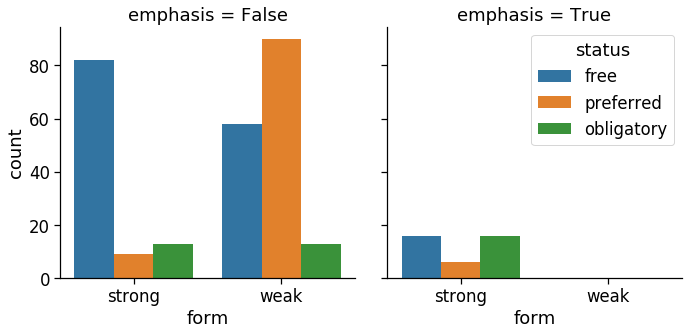

In [28]:
with seaborn.plotting_context('notebook', font_scale=1.5):
    ax = seaborn.catplot(x='form', hue='status', col='emphasis', data=annot[annot.type == 'personal'], hue_order=['free', 'preferred', 'obligatory'], kind='count', legend_out=False, legend=False);
    leg = ax.axes.flat[1].legend(loc='upper right')
    leg.set_title('status')
    ax.fig.tight_layout()
    ax.fig.savefig('/tmp/breakdown.pdf')
    ax.fig.savefig('/tmp/breakdown.png', dpi=300)

In [32]:
annot.head()

,form,status,emphasis,meaning change,type,novel,lineno,matchno,sent,length
0,weak,free,False,False,personal,Abdolah_Koning,5,1,Ahuramazda zegende de Koe : ' We hebben nieman...,189
1,strong,preferred,False,False,personal,Abdolah_Koning,5,2,Ahuramazda zegende de Koe : ' We hebben nieman...,189
2,strong,preferred,False,False,personal,Abdolah_Koning,5,3,Ahuramazda zegende de Koe : ' We hebben nieman...,189
3,strong,preferred,False,False,personal,Abdolah_Koning,5,4,Ahuramazda zegende de Koe : ' We hebben nieman...,189
4,strong,obligatory,False,False,personal,Abdolah_Koning,5,5,Ahuramazda zegende de Koe : ' We hebben nieman...,189


In [33]:
pospronoun.loc[pospronoun.lineno <= 100, :].head()

,novel,lineno,matchno,match,pos,func,token,number,tokenplus
0,Burgers-Drost_TussenHartEn,3,1,"(VNW[pers,pron,stan,red,3,mv]-su Ze)","VNW[pers,pron,stan,red,3,mv]",su,Ze,PL,ze-PL
1,Burgers-Drost_TussenHartEn,6,1,"(VNW[pers,pron,obl,vol,3p,mv]-obj1 hen)","VNW[pers,pron,obl,vol,3p,mv]",obj1,hen,PL,hen
2,Burgers-Drost_TussenHartEn,7,1,"(VNW[pers,pron,nomin,red,2v,ev]-su je)","VNW[pers,pron,nomin,red,2v,ev]",su,je,SG,je
3,Burgers-Drost_TussenHartEn,7,2,"(VNW[pr,pron,obl,red,1,ev]-obj1 me)","VNW[pr,pron,obl,red,1,ev]",obj1,me,SG,me
4,Burgers-Drost_TussenHartEn,7,3,"(VNW[pers,pron,stan,red,3,ev,fem]-su ze)","VNW[pers,pron,stan,red,3,ev,fem]",su,ze,SG,ze-SG


In [34]:
joined = annot.set_index(['novel', 'lineno', 'matchno']).join(
        pospronoun.loc[pospronoun.lineno <= 100, :].drop(['match'], axis=1).set_index(['novel', 'lineno', 'matchno']))
joined.head()

form      status  emphasis  meaning change  \
novel          lineno matchno                                                 
Abdolah_Koning 5      1          weak        free     False           False   
                      2        strong   preferred     False           False   
                      3        strong   preferred     False           False   
                      4        strong   preferred     False           False   
                      5        strong  obligatory     False           False   

                                   type  \
novel          lineno matchno             
Abdolah_Koning 5      1        personal   
                      2        personal   
                      3        personal   
                      4        personal   
                      5        personal   

                                                                            sent  \
novel          lineno matchno                                                      
Abdolah_Koning 5      1        Ahuramazda zegende de Koe : ' We hebben nieman...   
                      2        Ahuramazda zegende de Koe : ' We hebben nieman...   
                      3        Ahuramazda zegende de Koe : ' We hebben nieman...   
                      4        Ahuramazda zegende de Koe : ' We hebben nieman...   
                      5        Ahuramazda zegende de Koe : ' We hebben nieman...   

                               length                            pos  func  \
novel          lineno matchno                                                
Abdolah_Koning 5      1           189  VNW[pers,pron,nomin,red,1,mv]    su   
                      2           189   VNW[pers,pron,obl,vol,2v,ev]  obj1   
                      3           189  VNW[pers,pron,nomin,vol,1,mv]    su   
                      4           189   VNW[pers,pron,obl,vol,2v,ev]  obj1   
                      5           189   VNW[pers,pron,obl,vol,3p,mv]  obj1   

                              token number tokenplus  
novel          lineno matchno                         
Abdolah_Koning 5      1          We     PL        we  
                      2         jou     SG       jou  
                      3         Wij     PL       wij  
                      4         jou     SG       jou  
                      5         hen     PL       hen

In [35]:
joined[joined.emphasis]

form      status  emphasis  \
novel                     lineno matchno                                 
Abdolah_Koning            16     1        strong   preferred      True   
                          95     1        strong  obligatory      True   
Bernlef_ZijnDood          23     1        strong   preferred      True   
                          34     2        strong   preferred      True   
                          35     1        strong   preferred      True   
Dewulf_KleineDagen        9      1        strong  obligatory      True   
                          11     1        strong        free      True   
                          12     1        strong        free      True   
                                 2        strong        free      True   
                          14     2        strong  obligatory      True   
                          41     1        strong        free      True   
                          47     1        strong  obligatory      True   
                          48     1        strong  obligatory      True   
                          59     1        strong        free      True   
                          63     1        strong  obligatory      True   
                          64     1        strong        free      True   
                          91     1        strong        free      True   
Japin_Vaslav              15     1        strong  obligatory      True   
                          16     1        strong  obligatory      True   
                          29     2        strong        free      True   
                                 3        strong   preferred      True   
                          34     1        strong  obligatory      True   
                          47     1        strong        free      True   
                          50     1        strong        free      True   
                          62     1        strong        free      True   
                                 2        strong   preferred      True   
                          86     1        strong        free      True   
Kooten_Verrekijker        6      2        strong        free      True   
                          12     1        strong  obligatory      True   
                          48     1        strong  obligatory      True   
                          100    1        strong        free      True   
Springer_Quadriga         59     1        strong  obligatory      True   
                          62     4        strong  obligatory      True   
                          63     1        strong        free      True   
                          64     1        strong  obligatory      True   
Verhulst_LaatsteLiefdeVan 47     3        strong  obligatory      True   
                          75     2        strong        free      True   
                          82     2        strong  obligatory      True   

                                          meaning change      type  \
novel                     lineno matchno                             
Abdolah_Koning            16     1                 False  personal   
                          95     1                 False  personal   
Bernlef_ZijnDood          23     1                 False  personal   
                          34     2                 False  personal   
                          35     1                 False  personal   
Dewulf_KleineDagen        9      1                 False  personal   
                          11     1                 False  personal   
                          12     1                 False  personal   
                                 2                 False  personal   
                          14     2                 False  personal   
                          41     1                 False  personal   
                          47     1                 False  personal   
                          48     1                 False  personal   
                          59     

In [36]:
joined.loc[joined.pos.str.contains('nadr', na=False), :]

,,,form,status,emphasis,meaning change,type,sent,length,pos,func,token,number,tokenplus
novel,lineno,matchno,,,,,,,,,,,,


## Syntactic distribution

In [105]:
# FIXME: normalize per book? do we want percentages per form, or per function?
x = pandas.crosstab(pospronoun.func, pospronoun.tokenplus)
x = x.loc[x.sum(axis=1).sort_values(ascending=False).index, colorder]
x.iloc[:7, :]

tokenplus,mij,me,jij,jou,je,zij-SG,ze-SG,wij,we,zij-PL,hen,hun,ze-PL
func,,,,,,,,,,,,,
su,0,5,42049,0,314563,21330,583542,13323,156132,6023,0,0,199160
obj1,36114,104819,0,15979,51078,0,4,0,2,0,28358,467,30386
obj2,6771,45169,0,1933,16950,0,0,0,0,0,1117,3101,3598
se,516,29969,0,0,9905,0,0,0,0,0,0,0,0
,80,1014,315,40,2332,0,0,46,1436,113,5,2,4030
cnj,2208,0,2468,1197,1,0,0,203,0,2919,180,15,0
hd,849,19,1570,786,70,590,49,1365,52,919,1437,111,73


In [ ]:
data = (100 * x.T / x.sum(axis=1)).T.iloc[:7, :]
data.columns.name = 'form'
ax = seaborn.heatmap(data, annot=True, fmt='.1f', mask=data < 0.1, cmap='Oranges');
ax.figure.set_size_inches(10, 5);
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12);
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12);
ax.figure.tight_layout()
ax.figure.savefig('/tmp/funheatmap.pdf')

(i) grammatical role of the most recent instantiation of the antecedent

(ii) distance between occurrence of zij and most recent mention of antecedent (e.g., in same sentence but different clauses; separated by one or more main clauses etc.)

(iii) whether the referent of zij was being contrasted with other referents

(iv) whether there were any competing referents present (i.e. singular feminine referents) between the mention of the antecedent and the pronoun  zij

In [94]:
%matplotlib inline
import pandas
import seaborn
clusters = pandas.read_csv('/tmp/y/Siebelink_Oscar.clusters.tsv', index_col=0, sep='\t')
clusters.head()

,gender,human,number,size,firstmention,mentions,label
id,,,,,,,
0,m,1,sg,193,0,"0,6,8,1545,520,527,528,17,1041,19,20,21,529,53...",Oscar van Kervel
1,fm,1,sg,1,1,1,de chauffeur
2,fm,1,sg,2,2,"2,10",een korporaal van de Militaire Politie
3,-,-,sg,1,3,3,de Militaire Politie
4,-,-,sg,8,4,"960,961,963,948,4,940,958,959",hoek Groot


In [95]:
mentions = pandas.read_csv('/tmp/y/Siebelink_Oscar.mentions.tsv', index_col=0, sep='\t')
mentions.head()

,start,end,type,head,neclass,person,quote,gender,human,number,cluster,text
id,,,,,,,,,,,,
0,1,3,name,1,MISC,-,O,m,1,sg,0,Oscar van Kervel
1,5,6,noun,6,-,-,O,fm,1,sg,1,de chauffeur
2,8,13,noun,9,-,-,O,fm,1,sg,2,een korporaal van de Militaire Politie
3,11,13,noun,13,-,-,O,-,-,sg,3,de Militaire Politie
4,19,20,noun,19,-,-,O,-,-,sg,4,hoek Groot


In [96]:
conll = pandas.read_csv('/tmp/y/Siebelink_Oscar.conll', index_col=0, sep='\t', comment='#', quoting=3, header=None)
conll.columns = ['sentid', 'tokenno', 'token', 'lemma', 'pos', 'head', 'func', 'neclass', 'speaker', 'addressee', 'quote', 'coref']
conll.head()

,sentid,tokenno,token,lemma,pos,head,func,neclass,speaker,addressee,quote,coref
0,,,,,,,,,,,,
1,1-1,1,Oscar,Oscar,"N(eigen,ev,basis,genus,stan)",4,nsubj,MISC,-,-,O,(0
2,1-1,2,van,van,VZ(init),3,case,-,-,-,O,-
3,1-1,3,Kervel,Kervel,"N(eigen,ev,basis,zijd,stan)",1,nmod,PER,-,-,O,(0)|0)
4,1-1,4,vroeg,vragen,"WW(pv,verl,ev)",0,root,-,-,-,O,-
5,1-1,5,de,de,"LID(bep,stan,rest)",6,det,-,-,-,O,(1


In [133]:
%cd /home/andreas/code/dutchcoref/
import coref
def conllclusterdict(conlldata):                                                               
    """Extract dict from CoNLL file mapping gold cluster IDs to spans."""                      
    spansforcluster = {}                                                                       
    spans = set()                                                                              
    x = 0
    for sentno, chunk in enumerate(conlldata):                                                 
        scratch = {}                                                                           
        for idx, fields in enumerate(chunk):                                                   
            labels = fields[-1]                                                                
            for a in labels.split('|'):                                                        
                if a == '-' or a == '_':                                                       
                    continue                                                                   
                clusterid = int(a.strip('()'))                                                 
                if a.startswith('('):                                                          
                    scratch.setdefault(clusterid, []).append((sentno, idx))                    
                if a.endswith(')'):                                                            
                    sentno, begin = scratch[int(a.strip('()'))].pop()                          
                    text = ' '.join(line[3] for line in chunk[begin:idx + 1])                  
                    span = (sentno, x + begin + 1, x + idx + 1, text)                                      
                    if span in spans:                                                          
                        print('Warning: gold data has duplicate span %r '                      
                                'in cluster %d' % (span, clusterid))                           
                    spans.add(span)                                                            
                    spansforcluster.setdefault(clusterid, set()).add(span)
        x += idx + 1
        if any(scratch.values()):                                                              
            print({a: b for a, b in scratch.items() if b})                                     
            for line in chunk:                                                                 
                print('\t'.join(line))                                                         
            raise ValueError('Unclosed paren? sentno=%d' % (sentno))                           
    return spansforcluster

/home/andreas/code/dutchcoref


           ze   zij
nsubj      19  12.0
obj        10   2.0
obl         6   2.0
nmod        2   0.0
nmod:poss   2   2.0
parataxis   2   0.0
punct       1   0.0
expl:pv     1   0.0


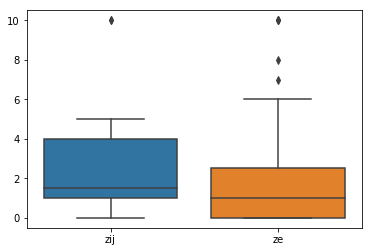

In [130]:
def foo(fname):
    def getfunc(begin, end):
        a, b = conll.at[begin, 'tokenno'], conll.at[end, 'tokenno']
        for n in range(begin, end + 1):
            hd = conll.at[n, 'head']
            if hd != '-' and (int(hd) < a or int(hd) > b):
                return conll.at[n, 'func']
        return '-'

    def makeplot(w1, w2, ignore):
        x = []
        for cluster, spans in spansforcluster.items():
            spans = sorted(spans)
            for n, (sentno, start, end, tokens) in enumerate(spans):
                if n and (tokens == w1 or tokens == w2):
                    prev = n - 1
                    # hack to ignore possessives as antencedents
                    while spans[prev][-1] == ignore:
                        prev -= 1
                    if prev < 0:
                        continue
                    x.append((tokens, sentno, getfunc(*spans[n][1:3]), spans[prev][0], getfunc(*spans[prev][1:3])))
        x1 = pandas.Series([a - b for tok, a, afunc, b, bfunc in x if tok.lower() == w1], name=w1)
        x2 = pandas.Series([a - b for tok, a, afunc, b, bfunc in x if tok.lower() == w2], name=w2)
        print(pandas.concat({
                w1: pandas.Series([a[-1] for a in x if a[0].lower() == w1]).value_counts(),
                w2: pandas.Series([a[-1] for a in x if a[0].lower() == w2]).value_counts()}, axis=1, sort=False, ).fillna(0).sort_values(by=w2, ascending=False))
        seaborn.boxplot(data=pandas.DataFrame([x1.clip(upper=10), x2.clip(upper=10)]).T);
    conlldata = coref.readconll('/home/andreas/code/riddlecoref/coref/%s' % fname)
    spansforcluster = conllclusterdict(conlldata)
    conll = pandas.read_csv('/tmp/y/%s' % fname, index_col=0, sep='\t', comment='#', quoting=3, header=None)
    conll.columns = ['sentid', 'tokenno', 'token', 'lemma', 'pos', 'head', 'func', 'neclass', 'speaker', 'addressee', 'quote', 'coref']
    makeplot('zij', 'ze', 'haar')

foo('Siebelink_Oscar.conll')

              ze  zij
nsubj       13.0  9.0
nmod         1.0  0.0
nmod:poss    1.0  0.0
obl          1.0  0.0
appos        1.0  0.0
flat:name    1.0  1.0
parataxis    1.0  1.0
expl:pv      1.0  0.0
obj          1.0  0.0
nsubj:pass   0.0  1.0
root         0.0  1.0


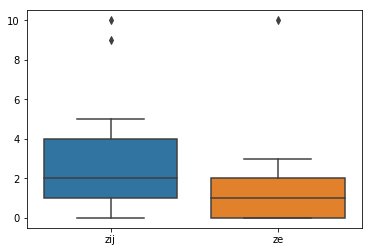

In [132]:
foo('Springer_Quadriga.conll')

In [4]:
outliers

Index(['Springer_Quadriga', 'Mitchell_NietVerhoordeGebeden',
       'Kooten_Verrekijker', 'Dewulf_KleineDagen', 'Japin_Vaslav',
       'Bernlef_ZijnDood', 'Verhulst_LaatsteLiefdeVan', 'Siebelink_Oscar',
       'Abdolah_Koning'],
      dtype='object')

In [12]:
novels_to_annotate = """Barnes_AlsofVoorbijIs
Bezaz_Vinexvrouwen
Binet_Hhhh
Carre_OnsSoortVerrader
Collins_Hongerspelen
Eco_BegraafplaatsVanPraag
Eggers_WatIsWat
Forsyth_Cobra
Gilbert_EtenBiddenBeminnen
Grunberg_HuidEnHaar
James_VijftigTintenGrijs
Kinsella_ShopaholicBaby
Kluun_Haantjes
Koch_Diner
Mansell_VersierMeDan
Moor_SchilderEnMeisje
Proper_GooischeVrouwen
Rowling_HarryPotterEn
Royen_Mannentester
Vermeer_Cruise
Voskuil_Buurman
Weisberger_ChanelChic
Worthy_JamesWorthy
Yalom_RaadselSpinoza""".splitlines()

In [29]:
%matplotlib inline
import os
import re
import pandas
import numpy as np
from glob import glob
from lxml import etree
import statsmodels.formula.api as smf
import statsmodels
%cd ~/code/dutchcoref
import coref
ngdata, gadata = coref.readngdata()
%cd ~/code/riddlecoref
outliers = ['Springer_Quadriga', 'Mitchell_NietVerhoordeGebeden',
       'Kooten_Verrekijker', 'Dewulf_KleineDagen', 'Japin_Vaslav',
       'Bernlef_ZijnDood', 'Verhulst_LaatsteLiefdeVan', 'Siebelink_Oscar',
       'Abdolah_Koning']

/home/andreas/code/dutchcoref
/home/andreas/code/riddlecoref


In [30]:
# for given weak/strong pronoun,
# - distance to preceding mention
# - function of preceding mention
# - size of entity, frequency of entity in fixed window
# - density of all person mentions in a fixed window
# - competing compatible mentions between pronoun and antecedent mention
def analyze(novel):
    result = []
    data = coref.readconll('coref/%s.conll' % novel)
    filenames = sorted(glob('parses/%s/*.xml' % novel), key=coref.parsesentid)
    trees = [(coref.parsesentid(filename), etree.parse(filename))                                    
            for filename in filenames]   
    mentions = coref.extractmentionsfromconll(data, trees, ngdata, gadata)
    mentionmap = {(mention.sentno, mention.begin, mention.end): mention for mention in mentions}
    goldspansforcluster = coref.conllclusterdict(data)
    goldspansforcluster = {clusterid: sorted(cluster) for clusterid, cluster in goldspansforcluster.items()}
    numsents = max(sentno for sentno, _begin, _end in mentionmap) + 1
    # (clusterid, sentno) => number of mentions from that chain in window of 10 sentences
    numclustermentions = pandas.DataFrame(
            {clusterid: [0] * numsents for clusterid in goldspansforcluster})
    for clusterid, cluster in goldspansforcluster.items():
        for span in cluster:
            # maybe only include compatible competing mentions
            # numtotmentions[span[0]] += 1
            numclustermentions.at[span[0], clusterid] += 1
    # sentno => number of mentions in window of 10 sentences
    numtotmentions = numclustermentions.sum(axis=1)
    # rolling sum; for each sentence, number of mentions in a x-sentence backwards looking window
    window = 10
    numclustermentions = numclustermentions.apply(
            lambda col: col.rolling(window, min_periods=0).sum(),
            axis=0)
    numtotmentions = numtotmentions.rolling(window, min_periods=0).sum()
    for clusterid, cluster in goldspansforcluster.items():
        for n, span in enumerate(cluster):
            if n and re.match(r'(?i)^(mij|jij|jou|zij|wij|hen|hun)$', span[3]):
                form = 'strong'
            elif n and re.match(r'(?i)^(me|je|ze|we)$', span[3]):
                form = 'weak'
            else:
                continue
            prevspan = cluster[n - 1]
            mention = mentionmap[span[:3]]
            prev = mentionmap[prevspan[:3]]
            if mention.node.get('vwtype') == 'bez':  # skip possessive
                continue
            pronfunc = mention.node.get('rel')
            if mention.node.getparent().get('cat') == 'pp':
                pronfunc = 'non-core' # mention.node.getparent().get('rel')
            numcompeting = sum(
                    prev.sentno <= m.sentno <= mention.sentno
                    and coref.compatible(mention, m)
                    for m in mentions)
            result.append((novel, *span, form, pronfunc,
                           *prevspan,
                           span[0] - prevspan[0],
                           prev.node.get('rel'),
                           numclustermentions.at[span[0], clusterid],
                           numtotmentions.at[span[0]], numcompeting,
                          ))
    return pandas.DataFrame(
            result,
            columns='novel sentno begin end pronoun form pronfunc asentno abegin aend antecedent distance function chain_density total_density competing'.split())

result = pandas.concat([
        analyze(os.path.basename(a).replace('.conll', ''))
        for a in glob('coref/*.conll')])
result['log_distance'] = np.log1p(result['distance'])
result['strong'] = (result.form == 'strong').astype(int)
result['antfunc'] = result['function']
result['antsubj'] = result['function'] == 'su'
result.loc[~result['antfunc'].isin(('su', 'obj1', 'obj2')), 'antfunc'] = 'other'
result['proncore'] = result['pronfunc'] != 'non-core'
result['pronfunc_simple'] = result['pronfunc']
result.loc[~result['pronfunc'].isin(('su', 'obj1', 'obj2', 'se', 'non-core')), 'pronfunc_simple'] = 'other'

In [341]:
pandas.crosstab(result['pronfunc'], result['form']).sort_values(by='strong', ascending=False).T

pronfunc,su,non-core,obj1,obj2,se,cnj,hd,dp,body,mwp,predc,--,nucl,ld,svp
form,,,,,,,,,,,,,,,
strong,374,153,103,91,31,20,20,11,9,2,2,1,1,0,0
weak,2127,135,238,114,81,0,1,0,0,2,3,22,1,6,1


In [342]:
pandas.crosstab(
        result.loc[result.novel.isin(outliers), 'pronfunc'],
        result.loc[result.novel.isin(outliers), 'form']
        ).sort_values(by='strong', ascending=False).T

pronfunc,su,non-core,obj1,obj2,se,cnj,hd,dp,body,--,mwp,nucl,ld,predc
form,,,,,,,,,,,,,,
strong,272,79,74,71,30,11,11,7,2,1,1,1,0,0
weak,818,32,69,34,23,0,0,0,0,6,1,0,3,2


In [235]:
result[result.form == 'weak']['function'].value_counts(normalize=True)

su       0.540828
det      0.177591
obj1     0.152691
obj2     0.030392
rhd      0.016111
se       0.014647
predc    0.009886
cnj      0.009520
hd       0.008422
--       0.006225
app      0.006225
sat      0.005859
dp       0.005492
nucl     0.005492
body     0.004028
tag      0.002563
mod      0.001465
mwp      0.001098
predm    0.001098
ld       0.000366
Name: function, dtype: float64

In [236]:
result[result.form == 'strong']['function'].value_counts(normalize=True)

su       0.475550
det      0.200489
obj1     0.167482
obj2     0.037897
dp       0.019560
hd       0.018337
cnj      0.012225
rhd      0.009780
se       0.009780
nucl     0.008557
predc    0.007335
sat      0.006112
--       0.004890
app      0.004890
body     0.004890
mwp      0.002445
mod      0.002445
top      0.002445
vc       0.001222
ld       0.001222
whd      0.001222
predm    0.001222
Name: function, dtype: float64

In [237]:
result.corr()

,sentno,begin,end,asentno,abegin,aend,distance,chain_density,total_density,competing,log_distance,strong
sentno,1.000000,-0.099545,-0.099545,0.995886,-0.081809,-0.081953,0.091862,-0.086904,-0.183051,0.055320,0.095490,-0.001248
begin,-0.099545,1.000000,1.000000,-0.094200,0.463183,0.464152,-0.063381,0.117471,0.340691,0.000706,-0.302125,0.060706
end,-0.099545,1.000000,1.000000,-0.094200,0.463183,0.464152,-0.063381,0.117471,0.340691,0.000706,-0.302125,0.060706
asentno,0.995886,-0.094200,-0.094200,1.000000,-0.083325,-0.083337,0.001252,-0.072535,-0.179660,-0.020222,0.040443,-0.002686
abegin,-0.081809,0.463183,0.463183,-0.083325,1.000000,0.996383,0.012846,0.133847,0.326226,0.067963,0.021697,0.007337
aend,-0.081953,0.464152,0.464152,-0.083337,0.996383,1.000000,0.011383,0.119109,0.326596,0.066666,0.018994,0.008609
distance,0.091862,-0.063381,-0.063381,0.001252,0.012846,0.011383,1.000000,-0.161958,-0.045807,0.832712,0.609364,0.015744
chain_density,-0.086904,0.117471,0.117471,-0.072535,0.133847,0.119109,-0.161958,1.000000,0.346055,-0.076040,-0.331168,-0.049525
total_density,-0.183051,0.340691,0.340691,-0.179660,0.326226,0.326596,-0.045807,0.346055,1.000000,0.039838,-0.167119,-0.018107
competing,0.055320,0.000706,0.000706,-0.020222,0.067963,0.066666,0.832712,-0.076040,0.039838,1.000000,0.418371,0.006742


In [ ]:
model = smf.logit(
        formula="strong ~ np.log1p(distance) + antsubj + proncore + chain_density",
        data=result,
        # subset=(result.pronfunc == 'su') & (result.pronoun.isin(('zij', 'ze', 'Zij', 'Ze')))
        ).fit()
model.summary()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 strong   No. Observations:                 3549
Model:                          Logit   Df Residuals:                     3544
Method:                           MLE   Df Model:                            4
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:                 0.04412
Time:                        21:16:49   Log-Likelihood:                -1831.4
converged:                       True   LL-Null:                       -1916.0
Covariance Type:            nonrobust   LLR p-value:                 1.650e-35
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4882      0.157      3.106      0.002       0.180       0.796
antsubj[T.True]       -0.2851      0.082     -3.473      0.001      -0.446      -0.124
proncore[T.True]      -1.5708      0.128    -12.254      0.000      -1.822      -1.320
np.log1p(distance)     0.0830      0.045      1.861      0.063      -0.004       0.170
chain_density         -0.0299      0.009     -3.424      0.001      -0.047      -0.013
======================================================================================
"""

In [88]:
model.pred_table(threshold=0.25)

array([[2347.,  384.],
       [ 581.,  237.]])

In [32]:
xx = model.summary()

In [41]:
open('/tmp/x.tex','w').write(xx.as_latex())

1595

In [40]:
open('/tmp/logitresults.csv','w').write(xx.as_csv())

989

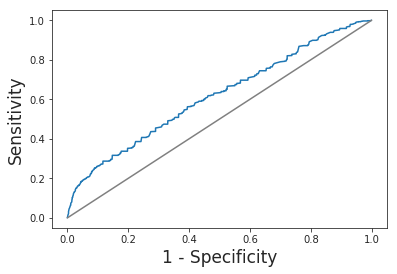

In [80]:
scores = model.predict(result)
uscores = np.unique(scores)
endog = result.strong
n1 = np.sum(endog)
n = len(scores)
Sens = np.zeros_like(uscores)
Spec = np.zeros_like(uscores)
for j, u in enumerate(uscores):
    Sens[j] = np.sum((scores >= u) * endog) / float(n1)
    Spec[j] = np.sum((scores <= u) * (1-endog)) / float(n - n1)

plt.plot(1 - Spec, Sens, '-')
plt.plot([0, 1], [0, 1], '-', color='grey')
plt.xlabel("1 - Specificity", size=17)
plt.ylabel("Sensitivity", size=17);

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(result.strong, model.predict(result))

0.6110016392429939

In [79]:
from sklearn.metrics import classification_report
#classification_report(result.strong, model.predict(result))
model.predict(result)

0      0.202644
1      0.226683
2      0.236455
3      0.202892
4      0.215558
5      0.188543
6      0.192810
7      0.175209
8      0.167049
9      0.204969
10     0.225445
11     0.210547
12     0.210547
13     0.295512
14     0.247702
15     0.192810
16     0.233036
17     0.171249
18     0.483559
19     0.186784
20     0.171249
21     0.267227
22     0.154652
23     0.645898
24     0.247000
25     0.193506
26     0.193506
27     0.294736
28     0.236455
29     0.188885
         ...   
123    0.191365
124    0.151072
125    0.191365
126    0.539237
127    0.146999
128    0.139662
129    0.247000
130    0.236455
131    0.247000
132    0.236052
133    0.197858
134    0.252600
135    0.197858
136    0.193158
137    0.184014
138    0.220270
139    0.302407
140    0.212099
141    0.253312
142    0.241893
143    0.252600
144    0.197858
145    0.258020
146    0.252600
147    0.252600
148    0.252600
149    0.193506
150    0.202644
151    0.257856
152    0.196275
Length: 3549, dtype: flo

In [287]:
# https://nbviewer.jupyter.org/urls/umich.box.com/shared/static/aouhn2mci77opm3v89vc.ipynb
endog = result.strong
n = len(result)
scores = np.zeros(n, dtype=np.float64)
for k in range(n):    
    ii = list(range(n))
    ii.pop(k)
    rslt = smf.logit(
            formula="strong ~ np.log1p(distance) + antsubj + pronfunc + chain_density", data=result,
            subset=ii).fit(disp=False)
    scores[k] = rslt.predict(result.iloc[k:k + 1, :])

uscores = np.unique(scores)
n1 = np.sum(endog)
Sens = np.zeros_like(uscores)
Spec = np.zeros_like(uscores)
for j, u in enumerate(uscores):
    Sens[j] = np.sum((scores >= u) * endog) / float(n1)
    Spec[j] = np.sum((scores <= u) * (1-endog)) / float(n - n1)

plt.plot(1 - Spec, Sens, '-')
plt.plot([0, 1], [0, 1], '-', color='grey')
plt.xlabel("1 - Specificity", size=17)
plt.ylabel("Sensitivity", size=17)

auc = 0.
for i in range(len(Spec) - 1):
    auc += (Spec[i + 1] - Spec[i]) * (Sens[i + 1] + Sens[i]) / 2
print(auc)

KeyboardInterrupt: 

In [290]:
scores

array([0.20202101, 0.22796485, 0.23713665, ..., 0.        , 0.        ,
       0.        ])

In [285]:
result.shape

(3549, 20)

In [271]:
model = statsmodels.discrete.conditional_models.ConditionalLogit.from_formula(
        formula="strong ~ 0 + np.log1p(distance) + antsubj + pronfunc + chain_density",
        data=result,
        groups='novel',
        # subset=(result.pronfunc == 'su') & (result.pronoun.isin(('zij', 'ze', 'Zij', 'Ze')))
        ).fit()
model.summary()

/home/andreas/.local/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ValueError: need covariance of parameters for computing (unnormalized) covariances

In [275]:
result.novel.value_counts()

Collins_Hongerspelen             468
Rowling_HarryPotterEn            404
Japin_Vaslav                     325
Dewulf_KleineDagen               190
Siebelink_Oscar                  166
Verhulst_LaatsteLiefdeVan        166
Springer_Quadriga                162
Abdolah_Koning                   153
Bernlef_ZijnDood                 151
Kooten_Verrekijker               128
Mitchell_NietVerhoordeGebeden    107
Eco_BegraafplaatsVanPraag         87
Binet_Hhhh                        74
Kluun_Haantjes                    67
Weisberger_ChanelChic             66
Proper_GooischeVrouwen            66
Vermeer_Cruise                    62
Mansell_VersierMeDan              62
Bezaz_Vinexvrouwen                61
Grunberg_HuidEnHaar               60
Koch_Diner                        59
Eggers_WatIsWat                   57
Kinsella_ShopaholicBaby           54
Worthy_JamesWorthy                49
Royen_Mannentester                46
Gilbert_EtenBiddenBeminnen        44
Forsyth_Cobra                     43
J

In [243]:
result.antfunc.value_counts()

su       1866
other    1015
obj1      554
obj2      114
Name: antfunc, dtype: int64

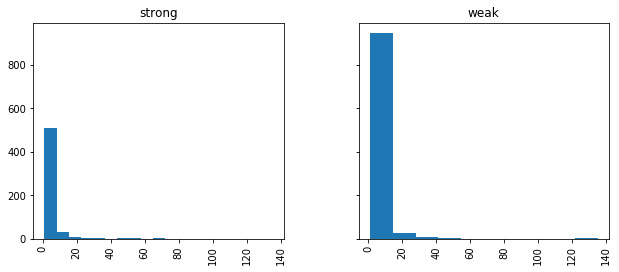

In [207]:
result.competing.hist(by=result.form, figsize=(10, 4), sharey=True, sharex=True);

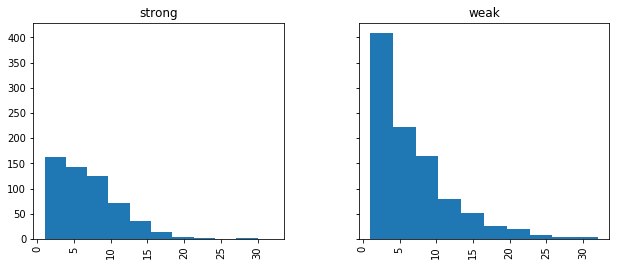

In [208]:
result.chain_density.hist(by=result.form, figsize=(10, 4), sharey=True, sharex=True);

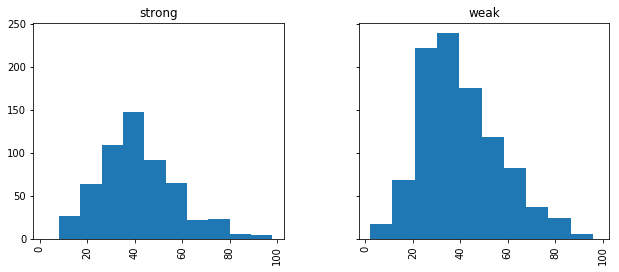

In [209]:
result.total_density.hist(by=result.form, figsize=(10, 4), sharey=True, sharex=True);

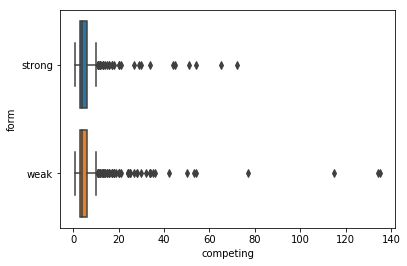

In [210]:
seaborn.boxplot(y='form', x='competing', data=result)

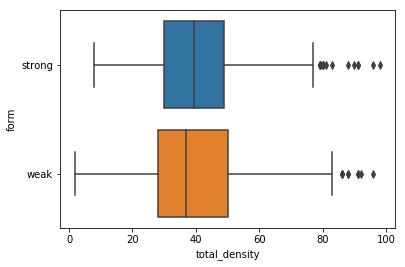

In [211]:
seaborn.boxplot(y='form', x='total_density', data=result)

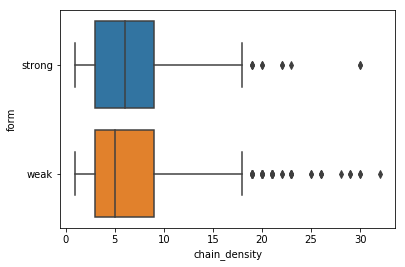

In [212]:
seaborn.boxplot(y='form', x='chain_density', data=result)

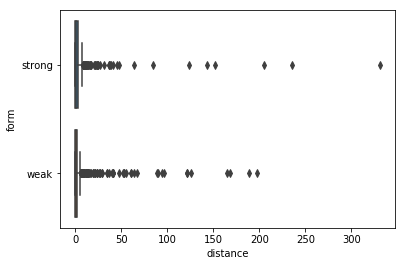

In [213]:
seaborn.boxplot(y='form', x='distance', data=result)

In [214]:
result

,novel,sentno,begin,end,pronoun,form,pronfunc,asentno,abegin,aend,...,distance,function,chain_density,total_density,competing,log_distance,strong,function_simple,pronfunc_core,sbj_ant
0,Springer_Quadriga,89,15,16,mij,strong,obj2,89,3,4,...,0,det,8.0,49.0,3,0.000000,1,other,True,False
1,Springer_Quadriga,89,22,23,mij,strong,non-core,89,15,16,...,0,obj2,8.0,49.0,3,0.000000,1,obj2,False,False
2,Springer_Quadriga,12,2,3,mij,strong,obj2,9,5,6,...,3,det,2.0,44.0,10,1.386294,1,other,True,False
3,Springer_Quadriga,20,10,11,mij,strong,obj2,19,2,3,...,1,det,7.0,39.0,4,0.693147,1,other,True,False
4,Springer_Quadriga,31,9,10,mij,strong,non-core,27,1,2,...,4,su,3.0,44.0,5,1.609438,1,su,False,True
5,Springer_Quadriga,32,4,5,mij,strong,obj2,31,9,10,...,1,obj1,5.0,48.0,4,0.693147,1,obj1,True,False
6,Springer_Quadriga,33,13,14,mij,strong,non-core,32,10,11,...,1,su,6.0,51.0,5,0.693147,1,su,False,True
7,Springer_Quadriga,35,14,15,mij,strong,obj1,33,13,14,...,2,obj1,7.0,56.0,4,1.098612,1,obj1,True,False
8,Springer_Quadriga,37,2,3,mij,strong,obj2,35,20,21,...,2,su,7.0,64.0,4,1.098612,1,su,True,True
9,Springer_Quadriga,45,18,19,mij,strong,non-core,41,0,1,...,4,su,3.0,65.0,7,1.609438,1,su,False,True


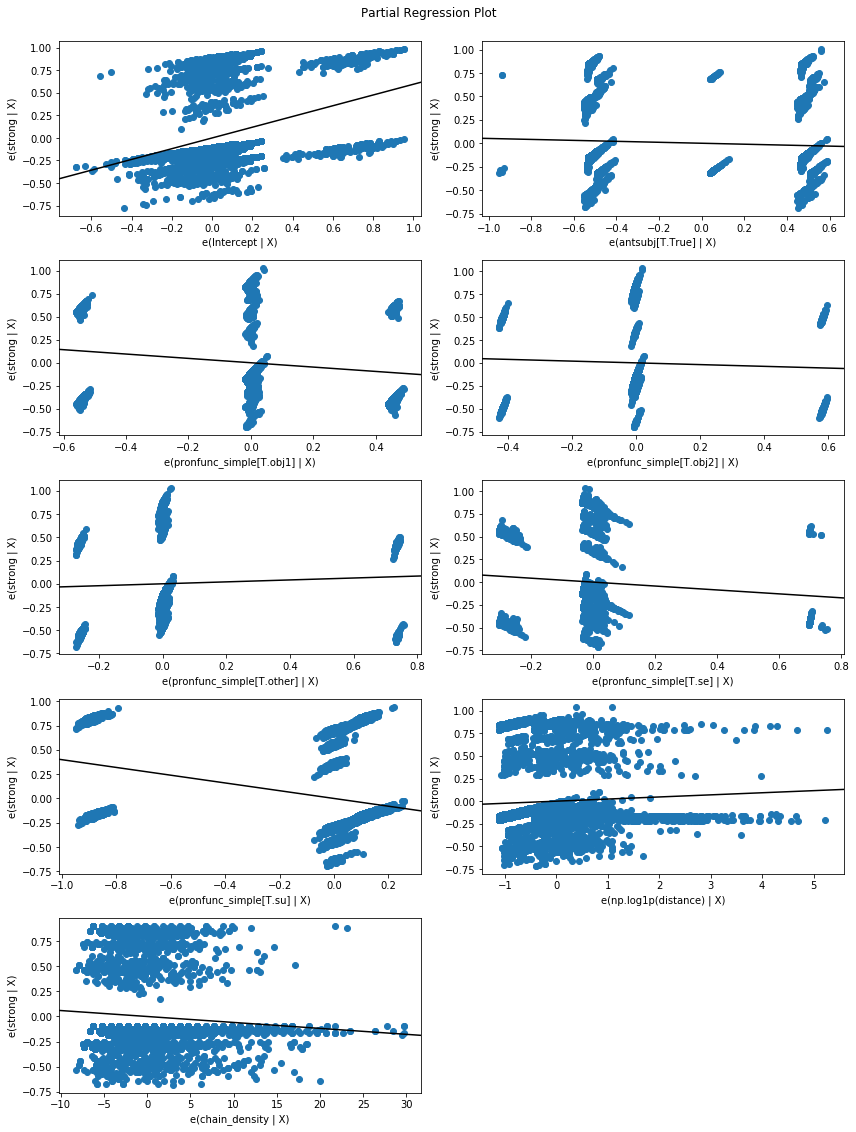

In [312]:
fig = plt.figure(figsize=(12, 16))
statsmodels.graphics.regressionplots.plot_partregress_grid(model, fig=fig)  # , exog_idx=[1, 2, 3, 4])
plt.show()

In [297]:
import statsmodels.api as sm
sm.graphics.plot_ccpr_grid(model, fig=fig)

AttributeError: 'LogitResults' object has no attribute 'resid'

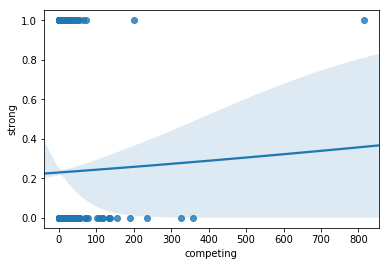

In [251]:
seaborn.regplot(x='competing', y='strong', data=result, logistic=True);

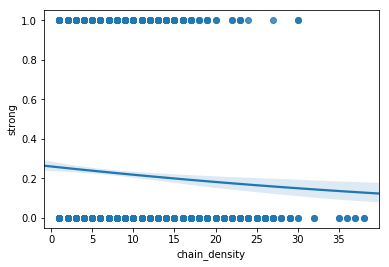

In [252]:
fig, ax = plt.subplots()
seaborn.regplot(x='chain_density', y='strong', data=result, logistic=True, ax=ax);
fig.savefig('/tmp/chaindensity.png', dpi=150)
fig.savefig('/tmp/chaindensity.pdf')

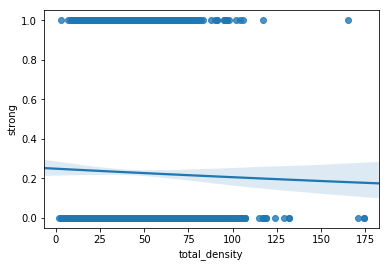

In [253]:
seaborn.regplot(x='total_density', y='strong', data=result, logistic=True);

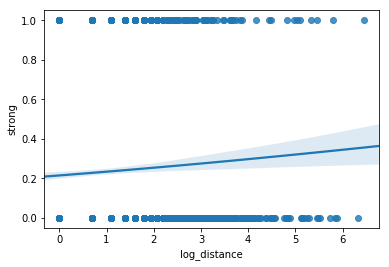

In [255]:
fig, ax = plt.subplots()
seaborn.regplot(x='log_distance', y='strong', data=result, logistic=True, ax=ax);
fig.savefig('/tmp/distance.png', dpi=150)
fig.savefig('/tmp/distance.pdf')

/home/andreas/Dropbox/accepted/Wuerzburg2019


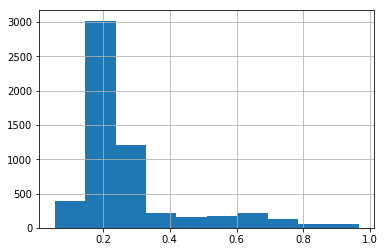

In [185]:
%cd ~/Dropbox/accepted/Wuerzburg2019/
a = pandas.read_table('lassybig_strong.csv', sep=':', header=None, index_col=0).sort_index()
b = pandas.read_table('lassybig_weak.csv', sep=':', header=None, index_col=0).sort_index()
lassy = pandas.DataFrame({'strong': a[1], 'weak': b[1], 'strong_prop': a[1] / (a[1] + b[1])})
# lassy.sort_values('strong_prop', ascending=False)
ax = lassy[(lassy.strong > 10) & (lassy.weak > 10)].strong_prop.hist();
ax.figure.savefig('/tmp/lassystrongprophist.pdf')

In [181]:
# FIXME: get rid of ANSI codes
lassy[(0.5 < lassy.strong_prop) & (lassy.strong_prop < 0.8)].sort_values(by='strong', ascending=False)

,strong,weak,strong_prop
0,,,
[35mWR-P-P-I/WR-P-P-I_part00018.split.mrg.zst[0m,2658,954,0.735880
[35mWR-P-P-I/WR-P-P-I_part00011.split.mrg.zst[0m,2591,725,0.781363
[35mWR-P-P-I/WR-P-P-I_part00017.split.mrg.zst[0m,2538,836,0.752223
[35mWR-P-P-I/WR-P-P-I_part00019.split.mrg.zst[0m,2529,1093,0.698233
[35mWR-P-P-I/WR-P-P-I_part00012.split.mrg.zst[0m,2479,1062,0.700085
[35mWR-P-P-I/WR-P-P-I_part00015.split.mrg.zst[0m,2452,975,0.715495
[35mWR-P-P-I/WR-P-P-I_part00014.split.mrg.zst[0m,2435,862,0.738550
[35mWR-P-P-I/WR-P-P-I_part00020.split.mrg.zst[0m,2390,1072,0.690352
[35mWR-P-P-I/WR-P-P-I_part00004.split.mrg.zst[0m,2285,1087,0.677639


In [175]:
lassy.weak.sum() / (lassy.strong.sum() + lassy.weak.sum())

0.7624047853798044